Social Networks SS21

# Home Assignment 1



### General Instructions

Submit your solution via Moodle until 23.59pm on Wednesday, May 12th.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the datasets you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1b), enter your answer in the specified markdown cell. Do NOT remove or edit the label (e.g. '__A1b):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Run your notebook from top to bottom, make sure there is no error!
  Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Runzhou',
        'last_name': 'Li',
        'student_id': 374512
    },
    {
        'first_name': 'Wen',
        'last_name': 'Sun',
        'student_id': 391587
    },
    {
        'first_name': 'Silyu',
        'last_name': 'Li',
        'student_id': 402523
    },
    {
        'first_name': 'Yifei',
        'last_name': 'Xu',
        'student_id': 403395
    }
]

In [3]:
# general immports may go here!
import networkx as nx
from numpy import *
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt

### The Train Bombing Network

For the most part of this home assignment, you will be working on the train bombing network, which is provided in an edgelist format in the file _train.edgelist_.
This undirected network contains contacts between suspected terrorists involved in the train bombing of Madrid on March 11, 2004 as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was a contact between the two terroists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participating in training camps or previous attacks. In the following, we will denote this network as $G$.

__References:__  
1) Dataset in the KONECT graph repository: http://konect.cc/networks/moreno_train/

2) Brian Hayes. Connecting the dots. Can the tools of graph theory and social-network studies unravel the next big plot? American Scientist, 94(5):400--404, 2006.

### Task 1:  Basic Network Properties (8 pts)

__a)__ Read in the data file and store the network into variable `G`. Store the number of nodes and edges of `G` into variables `n_nodes` and `n_edges`! **(2 pts)**


In [4]:
G = nx.read_weighted_edgelist('train.edgelist', comments='%')
n_nodes = G.number_of_nodes() # 64
n_edges = G.number_of_edges() # 243
print("Number of nodes: ", n_nodes)
print("Number of edges: ", n_edges)

Number of nodes:  64
Number of edges:  243


__b)__ Compute the average degree and the density of `G`. Store them into variables `avg_degree` and `density`. Is it sparse? Explain your answer! **(2 pts)**


In [5]:
#avg_degree = sum([item[1] for item in G.degree])/n_nodes # 7.59
avg_degree = 2 * n_edges / n_nodes # 7.59
density = nx.density(G) # 0.12
print("Average degree: ", avg_degree)
print("Density: ", density)

Average degree:  7.59375
Density:  0.12053571428571429


**A1b):**

The graph G is sparse, because 
- average degree <k\> = 7.59 << 64 = numberOfNodes
- numberOfEdges = 243 << 2016 = 64*63/2 = maximal number of edges

__c)__ Determine the network's diameter and average path length. Store them into variables `diameter`and `avg_pl`. Does it display the small-world-effect? Explain your answer! **(2 pts)**

In [45]:
diameter = nx.diameter(G)
avg_pl = nx.average_shortest_path_length(G)
print("Diameter: ", diameter)
print("Average shortest path length: ", avg_pl)

Diameter:  6
Average shortest path length:  2.6909722222222223


**A1c):** 

It shows the small-world-effect, because 
- the network has a small average shortest path length yet a relatively high average local clustering coefficient.

__d)__ Compute the average local clustering coefficient and store it into `avg_lcc`. Do you think it is highly clustered? Explain your answer! **(2 pts)**

In [46]:
avg_lcc = nx.average_clustering(G)
print("Average local clustering coefficient of G: ", avg_lcc)

randomG = nx.gnm_random_graph(n_nodes,n_edges)
avg_lcc_random = nx.average_clustering(randomG)
print("Average local clustering coefficient of a random graph with same size of nodes and edges: ", avg_lcc_random)

Average local clustering coefficient of G:  0.6223250206309915
Average local clustering coefficient of a random graph with same size of nodes and edges:  0.12825238997113997


**A1d):** 

It is highly clustered, because
- the average local clustering coefficient of G (0.62) is much bigger than that of a random graph with same size (0.12).

### Task 2: Node Centralities (15 pts)

In this task, we consider the following four node centrality measures:

1. Degree Centrality (DC)
2. Closeness Centrality (CC)
3. Betweenness Centrality (BC)
4. Eigenvector Centrality (EC)

__a)__ For each of the four measures, compute and store the corresponding centrality values of all nodes in the network in dictionaries `DC`, `CC`, `BC` and `EC`! The keys of the dictionaries should represent the node IDs and the corresponding values should represent the centrality of that node. Additionally, store for each of the four measures the node IDs (not the centrality values) with the 10 highest centrality values in lists `DC_top`, `CC_top`, `BC_top` and `EC_top` in descending order (first node in list should have the highest centrality value and so on)! **(3 pts)**

**Example:** _In the example below node 4 has a betweenness centrality of 0.01, which is the third highest value in the network of 4 nodes, as denoted by its third position in list `BC_top`:_

`BC = {'1': 0.05, '2': 0.221, '3': 0.0, '4': 0.01}`

`BC_top = ['2', '1', '4', '3']`

In [99]:
#Definite a function to sort centrality of all nodes and print the 10 highest centrality values
def SortCentrality(dict, name):
    dict = sorted(dict.items(),key=lambda item:item[1],reverse=True)
    dict = dict[:10]
    print('The 10 highest', name, 'centrality nodes are', dict)
    print('***************************************************')
    return dict

In [100]:
DC = nx.degree_centrality(G) # Degree Centrality of all nodes
CC = nx.closeness_centrality(G) # Closeness Centrality of all nodes
BC = nx.betweenness_centrality(G) # Betweenness Centrality of all nodes
EC = nx.eigenvector_centrality(G) # Eigenvector Centrality of all nodes

DC_top = SortCentrality(DC,'dergee') # Top10 Degree Centrality nodes
CC_top = SortCentrality(CC,'closeness') # Top10 Closeness Centrality nodes
BC_top = SortCentrality(BC,'betweenness') # Top10 Betweenness Centrality nodes
EC_top = SortCentrality(EC,'eigenvector') # Top10 Eigenvector Centrality nodes

The 10 highest dergee centrality nodes are [('1', 0.4603174603174603), ('3', 0.42857142857142855), ('7', 0.3492063492063492), ('10', 0.2857142857142857), ('25', 0.2698412698412698), ('16', 0.25396825396825395), ('18', 0.25396825396825395), ('17', 0.23809523809523808), ('22', 0.2222222222222222), ('30', 0.20634920634920634)]
***************************************************
The 10 highest closeness centrality nodes are [('1', 0.5833333333333334), ('3', 0.5727272727272728), ('25', 0.5080645161290323), ('7', 0.5), ('22', 0.49606299212598426), ('24', 0.4883720930232558), ('18', 0.48091603053435117), ('10', 0.47368421052631576), ('17', 0.47368421052631576), ('21', 0.47368421052631576)]
***************************************************
The 10 highest betweenness centrality nodes are [('49', 0.2296569891295954), ('1', 0.20089716941995484), ('3', 0.16427966506051503), ('24', 0.13772902712994878), ('7', 0.13705370000812914), ('22', 0.12616081681621877), ('18', 0.11891971720440744), ('17', 0

__b)__ For each of the four measures, compute the average and maximum distance of the most central node to all other nodes in the network! Store the average distances in `DC_avg`, `CC_avg`, `BC_avg`, `EC_avg` and maximum distances in `DC_max`, `CC_max`, `BC_max`, `EC_max`. **(4 pts)**

In [101]:
# define a function to compute average distance between nodes 
def ComputeAvgDistance(graph, topList, name):
    central_node = topList[0][0]
    NodeList = list(graph.nodes)
    NodeList.remove(central_node)
    distance = list(nx.shortest_path_length(graph, source=central_node, target=i)for i in NodeList)
    avg_distance = mean(distance)
    print('Average distance of', name, 'is:', avg_distance)
    return avg_distance

In [102]:
# define a function to compute maximum distance between nodes 
def ComputeMaxDistance(graph, topList, name):
    central_node = topList[0][0]
    NodeList = list(graph.nodes)
    NodeList.remove(central_node)
    distance = list(nx.shortest_path_length(graph, source=central_node, target=i)for i in NodeList)
    max_distance = max(distance)
    print('Maximum distance of', name, 'is:', max_distance)
    print('***************************')
    return max_distance

In [103]:
DC_avg = ComputeAvgDistance(G, DC_top,'Degree Centrality') #Degree Centrality
DC_max = ComputeMaxDistance(G, DC_top,'Degree Centrality')

CC_avg = ComputeAvgDistance(G, CC_top,'Closeness Centrality') #Closeness Centrality
CC_max = ComputeMaxDistance(G, CC_top,'Closeness Centrality')

BC_avg = ComputeAvgDistance(G, BC_top,'Betweenness Centrality') #Betweenness Centrality
BC_max = ComputeMaxDistance(G, BC_top,'Betweenness Centrality')

EC_avg = ComputeAvgDistance(G, EC_top,'Eigenvector Centrality') #Eigenvector Centrality
EC_max = ComputeMaxDistance(G, EC_top,'Eigenvector Centrality')


Average distance of Degree Centrality is: 1.7142857142857142
Maximum distance of Degree Centrality is: 4
***************************
Average distance of Closeness Centrality is: 1.7142857142857142
Maximum distance of Closeness Centrality is: 4
***************************
Average distance of Betweenness Centrality is: 2.3174603174603177
Maximum distance of Betweenness Centrality is: 4
***************************
Average distance of Eigenvector Centrality is: 1.7142857142857142
Maximum distance of Eigenvector Centrality is: 4
***************************


__c)__ For each of the four centrality measures, scale all node centralities in the graph such that their maximum is 1, i.e., divide them by the maximum value occuring in the network, and store the updated node centralities into `DC_scaled`, `CC_scaled`, `BC_scaled` and `EC_scaled` in the same format as in 2a! Plot the graph in a spring layout with node colors according to their centrality. Use the "coolwarm" colormap from matplotlib for this coloring. Make sure all networks have the same orientation! The code below should save your plots into files **"DC.png"**, **"CC.png"**, **"BC.png"** and **"EC.png"**. Do not remove the lines of code which create and save the .png files, and do not modify your solution from 2a), i.e., do not modify `DC`, `CC`, `BC` and `EC`! **(5 pts)**

The scaled centrality of DC is: {'1': 1.0, '2': 0.06896551724137931, '3': 0.9310344827586207, '4': 0.3448275862068966, '5': 0.3448275862068966, '6': 0.2413793103448276, '7': 0.7586206896551724, '8': 0.20689655172413793, '9': 0.13793103448275862, '10': 0.6206896551724138, '11': 0.3448275862068966, '12': 0.3448275862068966, '13': 0.3448275862068966, '14': 0.3793103448275862, '15': 0.3793103448275862, '16': 0.5517241379310345, '17': 0.5172413793103449, '18': 0.5517241379310345, '19': 0.27586206896551724, '20': 0.3793103448275862, '21': 0.41379310344827586, '22': 0.4827586206896552, '23': 0.41379310344827586, '24': 0.3793103448275862, '25': 0.5862068965517241, '26': 0.3448275862068966, '27': 0.13793103448275862, '28': 0.27586206896551724, '29': 0.3448275862068966, '30': 0.4482758620689655, '31': 0.20689655172413793, '32': 0.06896551724137931, '33': 0.06896551724137931, '34': 0.06896551724137931, '35': 0.034482758620689655, '36': 0.20689655172413793, '37': 0.06896551724137931, '38': 0.03448

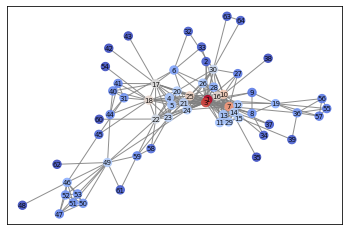

The plot of CC is following:


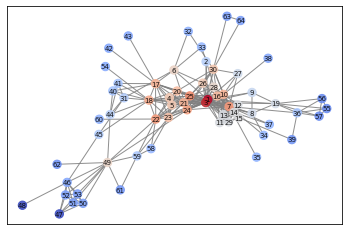

The plot of BC is following:


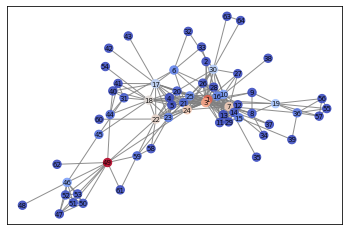

The plot of EC is following:


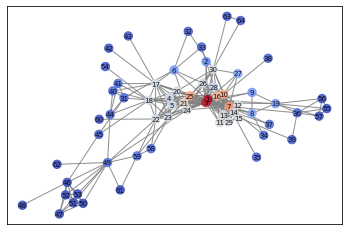

In [104]:
# define a function to scale the centrality
def ScaleCentrality(ori_centrality,name):
    centrality_List = list(ori_centrality.items())
    max_centrality = max([item[1] for item in centrality_List])
    scaled_value  = [(item[0], item[1]/max_centrality) for item in centrality_List]
#     transfer the type of scaled_value into dictionary because the format of DC_scaled need to be same with DC in 2(a) 
    node = []
    value = []
    for i in range(G.number_of_nodes()):
        node.append(scaled_value[i][0])
        value.append(scaled_value[i][1])
    scaled_value_dic ={}
    seg = zip(node,value)
    scaled_value_dic = dict(seg)
    print('The scaled centrality of',name,'is:', scaled_value_dic)
    print('******************************************************')
    return scaled_value_dic

# define a function to plot the graph and store them into files 
def PlotSpringLayout(graph, pos, scaledCentrality,name):
    scaledList = list(scaledCentrality.items())
    colorList = [item[1] for item in scaledList]
    nx.draw_networkx(graph, pos, cmap = 'coolwarm', node_color = colorList, 
                     vmax=1, node_size=70, font_size=7, alpha=0.88, edge_color='grey')
    print('The plot of', name, 'is following:')
    plt.savefig(name)
    plt.show()


DC_scaled = ScaleCentrality(DC,'DC') # Scaled Degree Centrality of all nodes
CC_scaled = ScaleCentrality(CC,'CC') # Scaled Closeness Centrality of all nodes
BC_scaled = ScaleCentrality(BC,'BC') # Scaled Betweenness Centrality of all nodes
EC_scaled = ScaleCentrality(EC,"EC") # Scaled Eigenvector Centrality of all nodes

pos = nx.spring_layout(G)
PlotSpringLayout(G, pos, DC_scaled,'DC')
PlotSpringLayout(G, pos, CC_scaled,'CC')
PlotSpringLayout(G, pos, BC_scaled,'BC')
PlotSpringLayout(G, pos, EC_scaled,'EC')

__d)__ After looking at these measures simultaneously, we look into how those measures differ from each other.
Use your node-wise similarities computed in a) to compute the correlation coefficient of all node-wise similarities between any two centrality measures. For example, store the correlation coefficient of the degree centrality (DC) and the closeness centrality (CC) in `DC_CC`. Which measures are the most correlated, and which measure is least correlated with the rest? Argue why that is the case! **(3 pts)**

In [105]:
import numpy
degree = list(DC.values())
closeness = list(CC.values())
betweenness = list(BC.values())
eigenvector = list(EC.values())

def ComputeCoefficient(list1,list2,name1,name2):
    Coefficient = numpy.corrcoef(list1, list2)[0, 1]
    print('The correlation coefficient of',name1,'and',name2,'is:', Coefficient)
    return Coefficient

In [106]:
DC_CC = ComputeCoefficient(degree,closeness,'DC','CC')
DC_BC = ComputeCoefficient(degree,betweenness,'DC','BC')
DC_EC = ComputeCoefficient(degree,eigenvector,'DC','EC')
CC_BC = ComputeCoefficient(closeness,betweenness,'CC','BC')
CC_EC = ComputeCoefficient(closeness,eigenvector,'CC','EC')
BC_EC = ComputeCoefficient(betweenness,eigenvector,'BC','EC')

The correlation coefficient of DC and CC is: 0.8869925367171713
The correlation coefficient of DC and BC is: 0.7228318670136665
The correlation coefficient of DC and EC is: 0.9191179355040959
The correlation coefficient of CC and BC is: 0.657881807747464
The correlation coefficient of CC and EC is: 0.9216085398123997
The correlation coefficient of BC and EC is: 0.5267639146134855


**A2d):** 
- The correlation coefficient of CC and EC is the highest. That means DC and EC are the most correlated, because closeness and eigenvector centralty can identify the most nodes with influence over the whole network. But there is only a tiny difference between the correlation coefficient of CC_EC and DC_EC, because the 10 highest closeness centrality nodes in these three measures are very similar according to 2(a).          
- The least correlated is BC and EC because the correlation coefficient of these two measures is the lowest.

### Task 3: Weak Ties and Triadic Closure (17 pts)

After looking at the nodes of the network, we now consider the (weighted) edges of the network.

__a)__ Consider the distribution of edge weigths. Which edge weights occur in the network, and how often does each edge weight occur in the network? Plot these occurences using a histogram and save it into a file called **"hist_weights.png"**! Do not remove the lines of code which create and save the .png file! **(2 pts)**

The edge weights and their occurances are [(1.0, 214), (3.0, 6), (4.0, 2), (2.0, 21)]  -


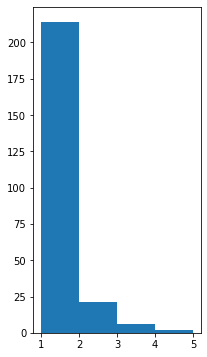

<Figure size 432x288 with 0 Axes>

In [107]:
# %matplotlib inline
weightList = [edge[2]["weight"] for edge in G.edges(data=True)]

weightDict = {}
for weight in weightList:
    if weight not in weightDict:
        weightDict[weight] = 1
    else:
        weightDict[weight] += 1
print("The edge weights and their occurances are", list(weightDict.items())," -")
plt.figure(figsize = (3,6))
hist = plt.hist(weightList, bins = range(6)[1:])
plt.show()
plt.savefig("hist_weights.png")


__b)__ Write a function that computes the neighborhood overlap score of a given edge, using the function signature which is specified in the cell below. Note that we want to return -1 if the edge does not exist in the network, and that for an edge between nodes $u$ and $v$, we do not count $u$ and $v$ into the union of neighbors in the denominator. **(4 pts)**

**Example:** _Let `H = nx.from_numpy_matrix(np.array([[0,1,1,1,0],[1,0,0,1,1],[1,0,0,1,0],[1,1,1,0,0],[0,1,0,0,0]]))` be an undirected NetworkX graph. Your implementation of `neighborhood_overlap` should return the same output as in the given examples below. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`neighborhood_overlap((0,1), H) == 0.3333333333333333`

`neighborhood_overlap((0,2), H) == 0.5`

`neighborhood_overlap((0,3), H) == 1.0`

`neighborhood_overlap((1,4), H) == 0.0`

In [108]:
def neighborhood_overlap(edge,G):
    """
    :param edge: pair of node IDs which indicate the edge we want to compute the node overlap on.
    :param G: networkx graph whose nodes we want to check. You may assume that it is undirected, but weighted
    :
    :return: the node overlap of the given edge as a float 
    """
    # your code here
    #raise NotImplementedError
    
    nodeA = edge[0]
    nodeB = edge[1]
    nbOfA = set(G.neighbors(nodeA))
    nbOfB = set(G.neighbors(nodeB))
    nbOfAandB = nbOfA & nbOfB
    nbOfAorB = (nbOfA | nbOfB) - {nodeA, nodeB}
    return len(nbOfAandB)/len(nbOfAorB)

__c)__ Apply your neighborhood overlap function on the network $G$, and save all edges which are local bridges as tuples into list `lb`! The first two values of the tuple should be the nodes of an edge, while the third value should represent the weight of this edge. Again, plot the graph and save it into file **"local_bridges.png"** using a spring layout with the same orientation as in task 2, with all nodes being blue, and color all edges which are local bridges in red! Do not remove the lines of code which create and save the .png file! **(3 pts)**

**Example:** _In the example below there are three local bridges in total. The first local bridge is an edge between nodes 6 and 33 with an edge weight of 1:_

`lb = [('6', '33', 1.0), ('8', '39', 1.0), ('8', '48', 1.0)]`

[('6', '31', {'weight': 1.0}), ('6', '32', {'weight': 1.0}), ('6', '33', {'weight': 1.0}), ('7', '35', {'weight': 1.0}), ('7', '36', {'weight': 1.0}), ('10', '38', {'weight': 1.0}), ('15', '39', {'weight': 1.0}), ('16', '33', {'weight': 1.0}), ('17', '42', {'weight': 1.0}), ('17', '43', {'weight': 1.0}), ('18', '54', {'weight': 1.0}), ('22', '60', {'weight': 1.0}), ('24', '49', {'weight': 1.0}), ('30', '32', {'weight': 1.0}), ('36', '39', {'weight': 1.0}), ('44', '49', {'weight': 1.0}), ('45', '46', {'weight': 1.0}), ('49', '62', {'weight': 1.0}), ('46', '48', {'weight': 1.0})]


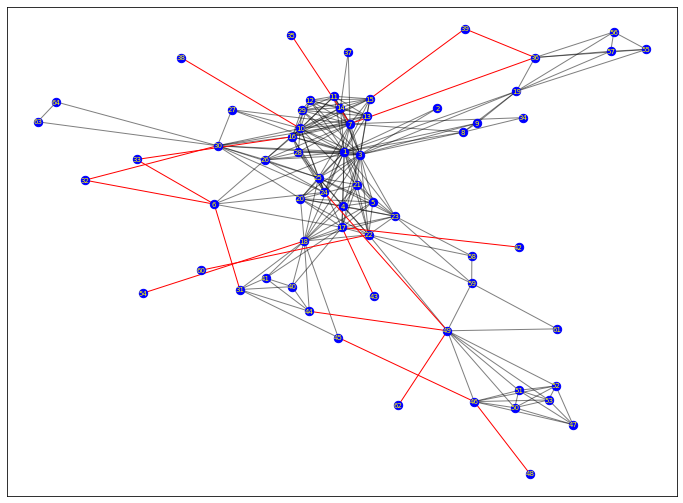

<Figure size 432x288 with 0 Axes>

In [109]:
lb = list(filter(lambda e: neighborhood_overlap(e,G) == 0, G.edges(data = True)))
print(lb)
localBridgeSet = {(e[0],e[1]) for e in lb}
nonBridgeSet = set(G.edges) - localBridgeSet

plt.figure(figsize = (12,9))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 70, node_color = 'blue', label = True)
nx.draw_networkx_edges(G, pos, edgelist = list(nonBridgeSet), alpha = 0.5)
nx.draw_networkx_edges(G, pos, edgelist = list(localBridgeSet),edge_color ='red')
nx.draw_networkx_labels(G, pos, font_size = 7, font_color = 'yellow')
plt.show()
plt.savefig("local_bridges.png")

__d)__ Finally, we want to check whether a weighted graph fulfills the strong triadic closure property. For that matter, we define an edge $e$ to be strong, if its weight is strictly higher than a given threshold $t$, and as weak otherwise. Implement a function that checks whether all nodes in a graph fulfill the strong triadic closure property, using the function signature in the cell below! **(6 pts)**

**Example:** _Let `H = nx.from_numpy_matrix(np.array([[0,2,1,0,0],[2,0,0,2,1],[1,0,0,0,0],[0,2,0,0,0],[0,1,0,0,0]]))` be an undirected weighted NetworkX graph. Your implementation of `check_stc` should return the same output as in the given examples below. The first output shows, that nodes 0 and 1 do not fulfill the STC property in H for t=0. If we would add an edge between nodes 1 and 2, then node 0 would fulfill the property. The last example shows that all nodes fulfill the property for t=2. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`check_stc(H,threshold=0) == (False, {0: [(1, 2)], 1: [(0, 3), (0, 4), (3, 4)]})`

`check_stc(H,threshold=1) == (False, {1: [(0, 3)]})`

`check_stc(H,threshold=2) == (True, {})`

In [110]:
def check_stc(G: nx.Graph, attr: Optional[str]="weight", threshold: Optional[int]=1) -> (bool, Dict[str, List[Tuple[str, str]]]):
    """
    :param G: networkx graph whose nodes we want to check. You may assume that it is undirected, but weighted
    :param attr: edge attribute the contains the weights we want to look into
    :param threshold: weight threshold which determines whether an edge is weak or strong. 
    :                
    :return: 1. A bool (True or False), indicating whether all nodes in the graph fulfill the STC property
    :        2. A dictionary of all nodes which do not fulfill the STC property (may be empty if no such node exists). 
    :           The keys are the node IDs, the values are a list of missing edges. 
    """
    # your code here
    #raise NotImplementedError
    
    non_STC = {}
    res = True
    for node in G.nodes:
        strongTies = list(filter(lambda edge: edge[2][attr] > threshold, G.edges(node,data=True)))
        for i in strongTies:
            for j in strongTies:
                if i[1] >= j[1]:
                    continue
                elif ((i[1],j[1])in G.edges or (j[1], i[1]) in G.edges):
                    pass
                else:
                    res = False
                    if node not in non_STC:
                        non_STC[node] = [(i[1],j[1])]
                    else:
                        non_STC[node] += [(i[1],j[1])]
    return (res, non_STC)
        

__e)__ Apply your function from d) to determine if all nodes in $G$ fulfill the strong triadic closure property, using the threshold $t=1$. If not, which nodes violate it? Do you obtain a different result for $t=2$? Give your answer in the corresponding cell below. Save all nodes which do not fulfill the STC property (may be empty if no such node exists) as a dictionary into `t1_violations` and `t2_violations` for the respective threshold. The keys are the node IDs, the values are a list of missing edges. **(2 pts)**

**Example:** _In the example below there are two violating nodes in total for threshold 1. The first one is node 3, where edges are missing between nodes 13 and 19, and between nodes 14 and 27 in order to fulfill the strong triadic closure property:_

`t1_violations = {'3': [('13', '19'), ('14', '27')], '11': [('22', '31')]}`

In [111]:
check_stc(G)
print(check_stc(G))
temp = check_stc(G)[1]

(False, {'1': [('13', '24'), ('13', '25'), ('14', '24'), ('14', '25'), ('15', '24'), ('15', '25')], '7': [('14', '28'), ('15', '28'), ('28', '29')], '10': [('14', '30')]})


In [112]:
check_stc(G,threshold = 2)

(True, {})

In [113]:
t1_violations = temp
print("nodes that violate for threshold = 1:", t1_violations)
print("*******************************************************")
t2_violations = {}
print("nodes that violate for threshold = 2:", t2_violations)

nodes that violate for threshold = 1: {'1': [('13', '24'), ('13', '25'), ('14', '24'), ('14', '25'), ('15', '24'), ('15', '25')], '7': [('14', '28'), ('15', '28'), ('28', '29')], '10': [('14', '30')]}
*******************************************************
nodes that violate for threshold = 2: {}


**A3e):** 

All nodes fulfill the strong tradic closure in the case that threshold has the value of 2, meanwhile the nodes 1, 7 and 10 violate it when t = 1.